# My Project: Student Performance Analysis - Understanding the Factors Behind Academic Success

## Introducing the problem:

Academic performance is influenced by a complex interplay of various factors, from individual study habits to broader socioeconomic conditions. Understanding these relationships is crucial for educators, policymakers, and parents who aim to support student success. In this project, I explore a comprehensive dataset of student performance factors to identify which variables most strongly predict exam scores.

### Research Questions

1. **What factors most strongly affect exam performance?** For example, how do study habits, parental involvement, and sleep compare in importance?
2. **How do socioeconomic factors influence academic outcomes?** So, what is the relationship between family income, parental education, and exam scores?
3. **What role does the learning environment play?** Like, how does school type, teacher quality, and access to resources impact performance?
4. **Are there gender differences in performance factors?** For instance, do male and female students respond differently to various study conditions?
5. **What is the optimal balance of study time and other activities?** Is there a point where more studying becomes counterproductive?

In [2]:
!pip3 install pandas matplotlib numpy

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 30.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.3 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.2 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Introducing the data

The dataset used in this analysis is **StudentPerformanceFactors.csv**, which provides a comprehensive overview of various factors affecting student performance in exams. This dataset includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

### Dataset Features

The dataset contains 20 features that capture different aspects of student life and academic environment:

- **Study Habits**: Hours_Studied (hours per week), Previous_Scores (from previous exams)
- **Attendance**: Percentage of classes attended
- **Family Factors**: Parental_Involvement (Low/Medium/High), Parental_Education_Level, Family_Income
- **Learning Environment**: School_Type (Public/Private), Teacher_Quality, Access_to_Resources
- **Personal Factors**: Sleep_Hours, Motivation_Level, Physical_Activity, Gender
- **Support Systems**: Tutoring_Sessions, Internet_Access, Extracurricular_Activities
- **Social Factors**: Peer_Influence, Distance_from_Home
- **Special Needs**: Learning_Disabilities
- **Outcome**: Exam_Score (the target variable)

This rich dataset allows us to explore the complex relationships between various factors and academic performance.

In [4]:
# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (6607, 20)

First few rows:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
# Basic information about the dataset
print("Dataset Info:")
df.info()

print("\n" + "="*50)
print("\nDescriptive Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Preprocessing

Before conducting our analysis, we need to clean and prepare the data. This involves handling missing values, encoding categorical variables, and ensuring data quality. 

1. Handling missing values - I first identified missing values in the dataset using `df.isna().sum()` and found 235 total missing values across various columns. For numeric columns like Hours_Studied and Sleep_Hours, I filled missing values with the median of each column, which preserves the central tendency of the data distribution and is more robust to outliers than using the mean. For categorical columns such as Distance_from_Home and Parental_Education_Level, I filled missing values with the mode (most frequent value) of each column, which maintains the most common category and prevents introducing new, potentially meaningless categories.

2. Categorical variable encoding - I systematically encoded all categorical variables to make them suitable for analysis and visualization. Binary variables like Extracurricular_Activities, Internet_Access, and Learning_Disabilities were mapped to 1/0 (Yes/No) for clear interpretation. Ordinal variables such as Parental_Involvement (Low/Medium/High) and Family_Income (Low/Medium/High) were encoded as 1/2/3 to preserve their inherent order and magnitude relationships, which is crucial for understanding the strength of these factors on exam performance. Nominal variables like School_Type and Gender were one-hot encoded using `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity issues while maintaining all necessary information for analysis.

3. Outlier detection and analysis - I used the Interquartile Range (IQR) method to detect outliers in key numeric variables including Hours_Studied, Sleep_Hours, Exam_Score, and Previous_Scores. This method identifies values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR as potential outliers. However, I chose to retain these outliers rather than remove them because they likely represent legitimate variations in student behavior - for example, some students may genuinely study 30+ hours per week or have very high exam scores, and removing these would eliminate important insights about exceptional performers or study patterns.

In [6]:
# Check for missing values
print("Missing values in each column:")
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

print(f"\nTotal missing values: {df.isna().sum().sum()}")

Missing values in each column:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

Total missing values: 235


In [7]:
# Handle missing values
# For numeric columns, fill with median
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill with mode or 'Unknown'
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isna().sum() > 0:
        mode_value = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
        df[col].fillna(mode_value, inplace=True)

print("Missing values after handling:", df.isna().sum().sum())

Missing values after handling: 0


/var/folders/6z/d62xs94j4v54jk39_7165xlm0000gn/T/ipykernel_2805/3071871634.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [8]:
# Encode categorical variables
# Create a copy for encoding
df_encoded = df.copy()

# Binary variables (Yes/No)
binary_mappings = {
    'Extracurricular_Activities': {'Yes': 1, 'No': 0},
    'Internet_Access': {'Yes': 1, 'No': 0},
    'Learning_Disabilities': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# Ordinal variables
ordinal_mappings = {
    'Parental_Involvement': {'Low': 1, 'Medium': 2, 'High': 3},
    'Access_to_Resources': {'Low': 1, 'Medium': 2, 'High': 3},
    'Motivation_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Family_Income': {'Low': 1, 'Medium': 2, 'High': 3},
    'Teacher_Quality': {'Low': 1, 'Medium': 2, 'High': 3},
    'Peer_Influence': {'Negative': 1, 'Neutral': 2, 'Positive': 3},
    'Distance_from_Home': {'Far': 1, 'Moderate': 2, 'Near': 3},
    'Parental_Education_Level': {'High School': 1, 'College': 2, 'Postgraduate': 3}
}

for col, mapping in ordinal_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# Nominal variables (one-hot encoding)
nominal_columns = ['School_Type', 'Gender']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_columns, drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)
print("\nEncoded dataset columns:")
print(df_encoded.columns.tolist())

Encoded dataset shape: (6607, 20)

Encoded dataset columns:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score', 'School_Type_Public', 'Gender_Male']


In [9]:
# Detect and handle outliers
# Focus on key numeric variables
key_variables = ['Hours_Studied', 'Sleep_Hours', 'Exam_Score', 'Previous_Scores']

print("Outlier detection using IQR method:")
for var in key_variables:
    Q1 = df_encoded[var].quantile(0.25)
    Q3 = df_encoded[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_encoded[(df_encoded[var] < lower_bound) | (df_encoded[var] > upper_bound)]
    print(f"{var}: {len(outliers)} outliers out of {len(df_encoded)} observations ({len(outliers)/len(df_encoded)*100:.1f}%)")

# For this analysis, we'll keep outliers as they might represent real variations in student behavior
print("\nNote: Outliers are retained as they may represent legitimate variations in student behavior.")

Outlier detection using IQR method:
Hours_Studied: 43 outliers out of 6607 observations (0.7%)
Sleep_Hours: 0 outliers out of 6607 observations (0.0%)
Exam_Score: 104 outliers out of 6607 observations (1.6%)
Previous_Scores: 0 outliers out of 6607 observations (0.0%)

Note: Outliers are retained as they may represent legitimate variations in student behavior.


## Data Understanding & Visualization

Now I want to walk you through the data via various visualizations to understand the relationships between different factors and exam performance.

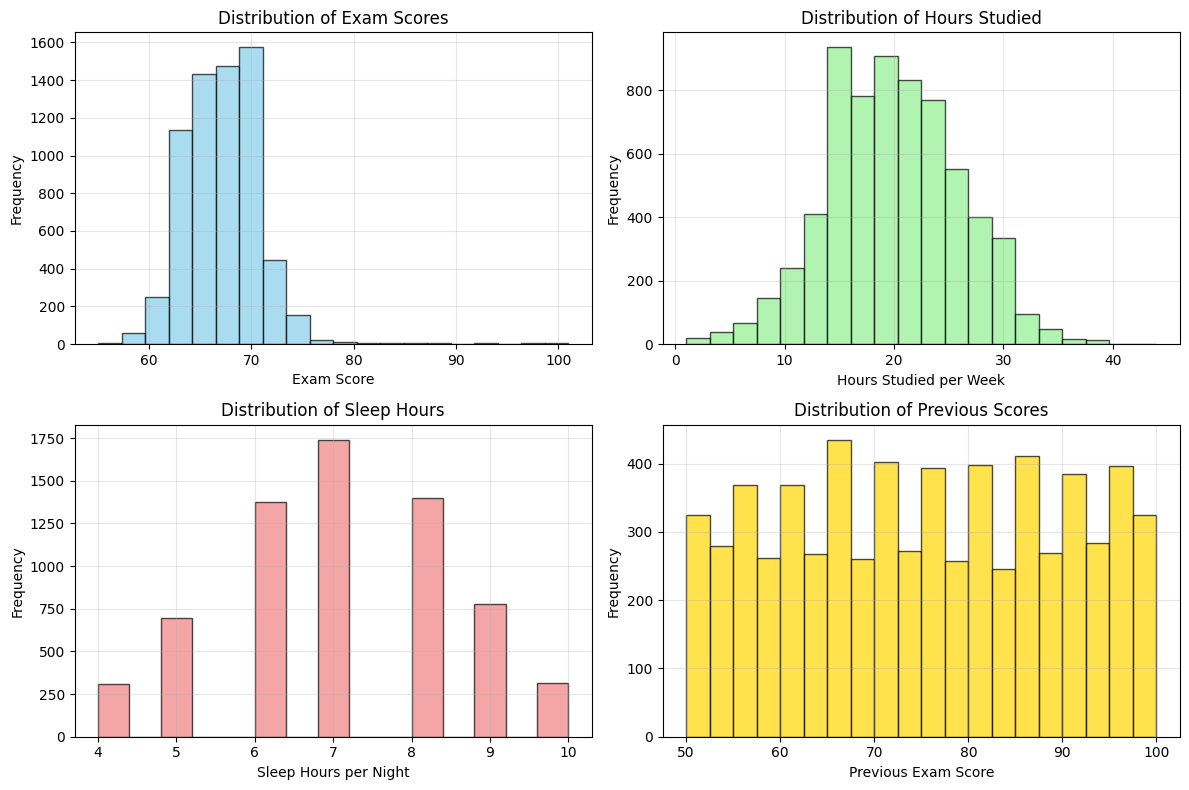

Exam Score Statistics:
Mean: 67.24
Median: 67.00
Std: 3.89
Min: 55.00
Max: 101.00


In [10]:
# 1. Distribution of Exam Scores
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df_encoded['Exam_Score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(df_encoded['Hours_Studied'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied per Week')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.hist(df_encoded['Sleep_Hours'], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.hist(df_encoded['Previous_Scores'], bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribution of Previous Scores')
plt.xlabel('Previous Exam Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Exam Score Statistics:")
print(f"Mean: {df_encoded['Exam_Score'].mean():.2f}")
print(f"Median: {df_encoded['Exam_Score'].median():.2f}")
print(f"Std: {df_encoded['Exam_Score'].std():.2f}")
print(f"Min: {df_encoded['Exam_Score'].min():.2f}")
print(f"Max: {df_encoded['Exam_Score'].max():.2f}")

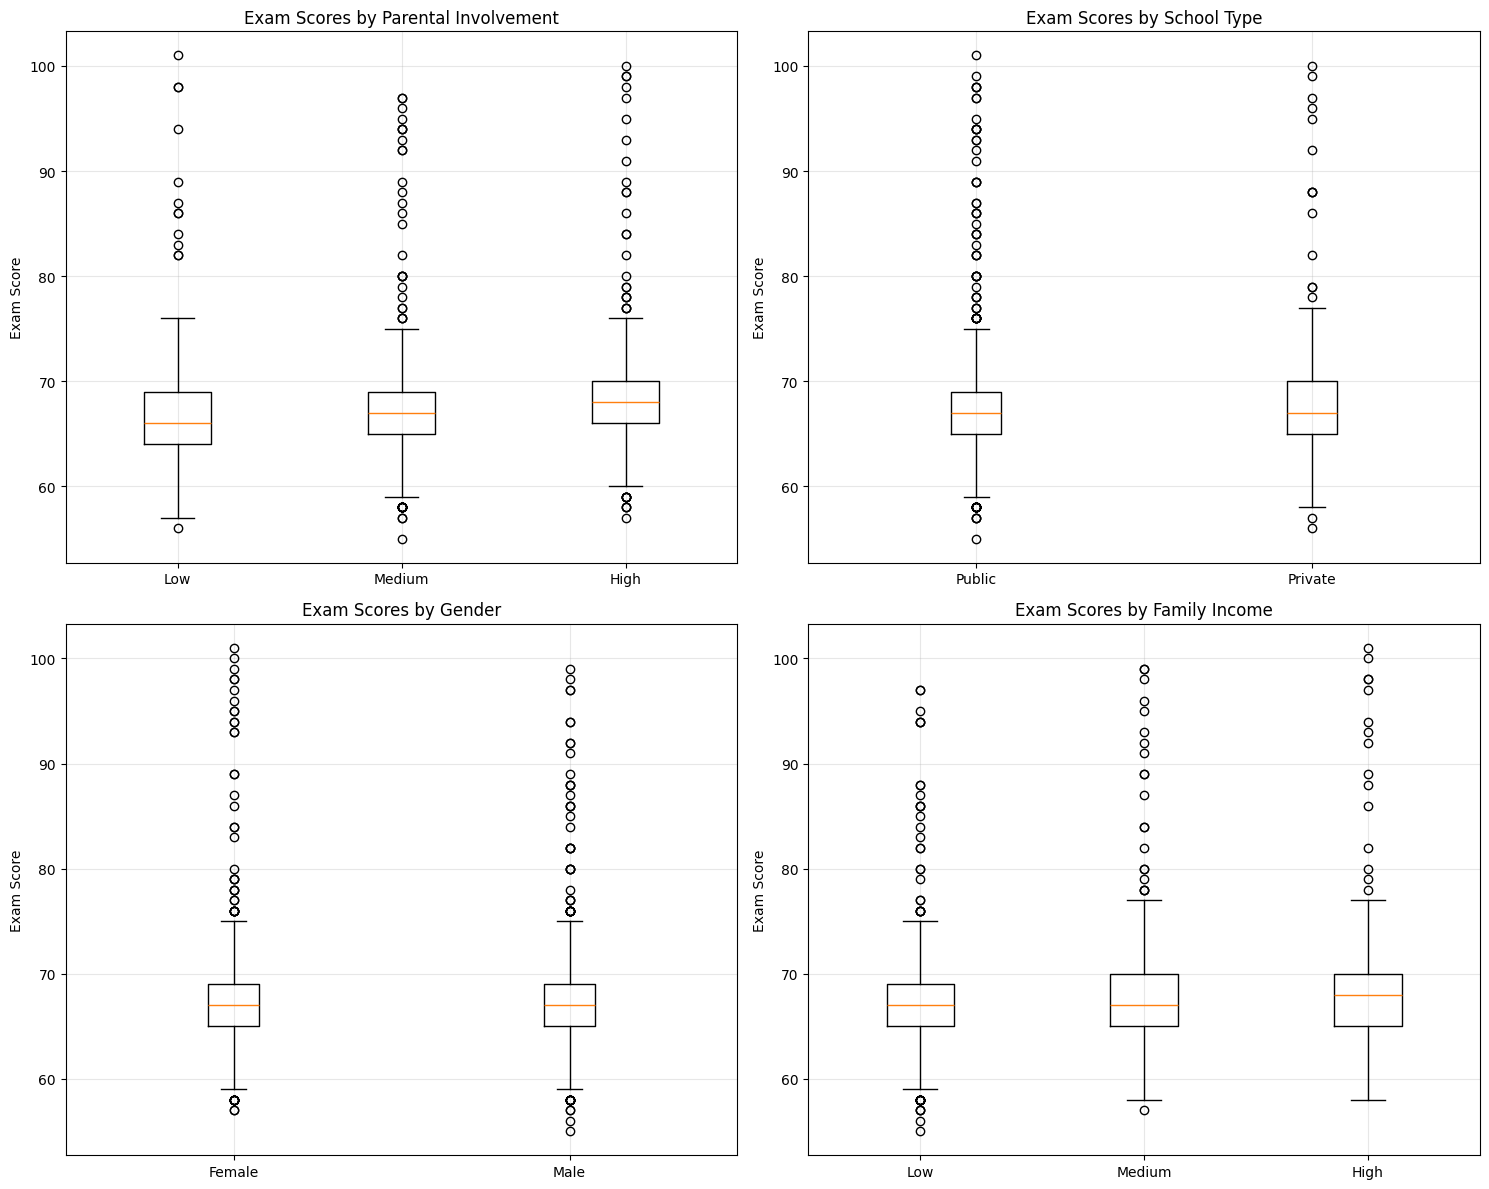

In [12]:
# 2. Boxplots comparing Exam Scores across different categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Parental Involvement
parental_data = [df_encoded[df_encoded['Parental_Involvement'] == i]['Exam_Score'] for i in [1, 2, 3]]
axes[0, 0].boxplot(parental_data, tick_labels=['Low', 'Medium', 'High'])
axes[0, 0].set_title('Exam Scores by Parental Involvement')
axes[0, 0].set_ylabel('Exam Score')
axes[0, 0].grid(True, alpha=0.3)

# School Type (Note: School_Type_Public=0 means Public, School_Type_Public=1 means Private)
school_data = [df_encoded[df_encoded['School_Type_Public'] == i]['Exam_Score'] for i in [1, 0]]
axes[0, 1].boxplot(school_data, tick_labels=['Public', 'Private'])
axes[0, 1].set_title('Exam Scores by School Type')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].grid(True, alpha=0.3)

# Gender
gender_data = [df_encoded[df_encoded['Gender_Male'] == i]['Exam_Score'] for i in [0, 1]]
axes[1, 0].boxplot(gender_data, tick_labels=['Female', 'Male'])
axes[1, 0].set_title('Exam Scores by Gender')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].grid(True, alpha=0.3)

# Family Income
income_data = [df_encoded[df_encoded['Family_Income'] == i]['Exam_Score'] for i in [1, 2, 3]]
axes[1, 1].boxplot(income_data, tick_labels=['Low', 'Medium', 'High'])
axes[1, 1].set_title('Exam Scores by Family Income')
axes[1, 1].set_ylabel('Exam Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()